# FINAL PROJECT
# INTRODUCING PYTHON FOR DATA SCIENCE

## EPL Results 1993-2018

### Pengantar

Kumpulan data ini berisi hasil dari setiap pertandingan Liga Premier dari 1993-1994 hingga 2017-2018.

Ini juga termasuk hasil paruh waktu, tetapi hanya dari 1995-96 hingga 2017-18.

Sumber data berasal dari Kaggle.

### Import Library

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 21)
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.naive_bayes import GaussianNB

Dataset ini memiliki kolom:
Kolom termasuk Divisi (dilambangkan sebagai E0), 
<!-- Tim Tuan Rumah, 
Tim Tamu, 
FTHG (gol kandang terakhir kali), 
FTAG (gol tandang waktu terakhir), 
FTR (hasil waktu penuh), 
HTHG (gol kandang paruh waktu), 
HTAG (gol tandang paruh waktu) ), 
HTR (hasil paruh waktu), dan musim. -->
- `Div` : Divisi, dilambangkan sebagai E0
- `HomeTeam` : Tim tuan rumah
- `AwayTeam` : Tim tamu
- `FTHG` : Gol kandang akhir waktu
- `FTAG` : Gol tandang akhir waktu
- `FTR` : Hasil pertandingan hingga selesai
- `HTHG` : Gol kandang paruh waktu
- `HTAG` : Gol tandang paruh waktu
- `HTR` : Hasil paruh waktu
- `season` : Musim

In [16]:
dataset = pd.read_csv('dataset/EPL_Set.csv')
dataset

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,E0,14/08/93,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,1993-94
1,E0,14/08/93,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,1993-94
2,E0,14/08/93,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,1993-94
3,E0,14/08/93,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,1993-94
4,E0,14/08/93,Man City,Leeds,1,1,D,NaN,NaN,NaN,1993-94
...,...,...,...,...,...,...,...,...,...,...,...
9659,E0,13/05/18,Newcastle,Chelsea,3,0,H,1.0,0.0,H,2017-18
9660,E0,13/05/18,Southampton,Man City,0,1,A,0.0,0.0,D,2017-18
9661,E0,13/05/18,Swansea,Stoke,1,2,A,1.0,2.0,A,2017-18
9662,E0,13/05/18,Tottenham,Leicester,5,4,H,1.0,2.0,A,2017-18


In [17]:
dataset.head(10)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,E0,14/08/93,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,1993-94
1,E0,14/08/93,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,1993-94
2,E0,14/08/93,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,1993-94
3,E0,14/08/93,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,1993-94
4,E0,14/08/93,Man City,Leeds,1,1,D,NaN,NaN,NaN,1993-94
5,E0,14/08/93,Newcastle,Tottenham,0,1,A,NaN,NaN,NaN,1993-94
6,E0,14/08/93,Oldham,Ipswich,0,3,A,NaN,NaN,NaN,1993-94
7,E0,14/08/93,Sheffield United,Swindon,3,1,H,NaN,NaN,NaN,1993-94
8,E0,14/08/93,Southampton,Everton,0,2,A,NaN,NaN,NaN,1993-94
9,E0,14/08/93,West Ham,Wimbledon,0,2,A,NaN,NaN,NaN,1993-94


In [18]:
dataset.tail(10)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
9654,E0,13/05/18,Burnley,Bournemouth,1,2,A,1.0,0.0,H,2017-18
9655,E0,13/05/18,Crystal Palace,West Brom,2,0,H,0.0,0.0,D,2017-18
9656,E0,13/05/18,Huddersfield,Arsenal,0,1,A,0.0,1.0,A,2017-18
9657,E0,13/05/18,Liverpool,Brighton,4,0,H,2.0,0.0,H,2017-18
9658,E0,13/05/18,Man United,Watford,1,0,H,1.0,0.0,H,2017-18
9659,E0,13/05/18,Newcastle,Chelsea,3,0,H,1.0,0.0,H,2017-18
9660,E0,13/05/18,Southampton,Man City,0,1,A,0.0,0.0,D,2017-18
9661,E0,13/05/18,Swansea,Stoke,1,2,A,1.0,2.0,A,2017-18
9662,E0,13/05/18,Tottenham,Leicester,5,4,H,1.0,2.0,A,2017-18
9663,E0,13/05/18,West Ham,Everton,3,1,H,1.0,0.0,H,2017-18


In [19]:
dataset.shape

(9664, 11)

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9664 entries, 0 to 9663
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       9664 non-null   object 
 1   Date      9664 non-null   object 
 2   HomeTeam  9664 non-null   object 
 3   AwayTeam  9664 non-null   object 
 4   FTHG      9664 non-null   int64  
 5   FTAG      9664 non-null   int64  
 6   FTR       9664 non-null   object 
 7   HTHG      8740 non-null   float64
 8   HTAG      8740 non-null   float64
 9   HTR       8740 non-null   object 
 10  Season    9664 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 830.6+ KB


In [25]:
dataset.isnull().sum()

Div           0
Date          0
HomeTeam      0
AwayTeam      0
FTHG          0
FTAG          0
FTR           0
HTHG        924
HTAG        924
HTR         924
Season        0
dtype: int64

In [34]:
dataset = dataset.drop(columns=['HTHG','HTAG','HTR'])

In [35]:
dataset.isnull().sum()

Div         0
Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
Season      0
dtype: int64

### Exploratory Data

In [39]:
# Jumlah pertandingan kandang yang dimainkan masing-masing tim dari 1993 hingga Mei 2018
dataset["HomeTeam"].value_counts(dropna=False)

Tottenham           479
Man United          479
Chelsea             479
Arsenal             479
Everton             479
Liverpool           479
Aston Villa         441
Newcastle           441
West Ham            422
Man City            384
Southampton         346
Blackburn           327
Sunderland          304
Middlesbrough       247
Fulham              247
Bolton              247
Leicester           230
West Brom           228
Leeds               213
Stoke               190
Coventry            156
Crystal Palace      154
Charlton            152
Wigan               152
Wimbledon           137
Sheffield Weds      137
Norwich             137
Swansea             133
Birmingham          133
Derby               133
Portsmouth          133
QPR                 118
Watford              95
Hull                 95
Ipswich              80
Nott'm Forest        78
Burnley              76
Wolves               76
Reading              57
Bournemouth          57
Sheffield United     40
Bradford        

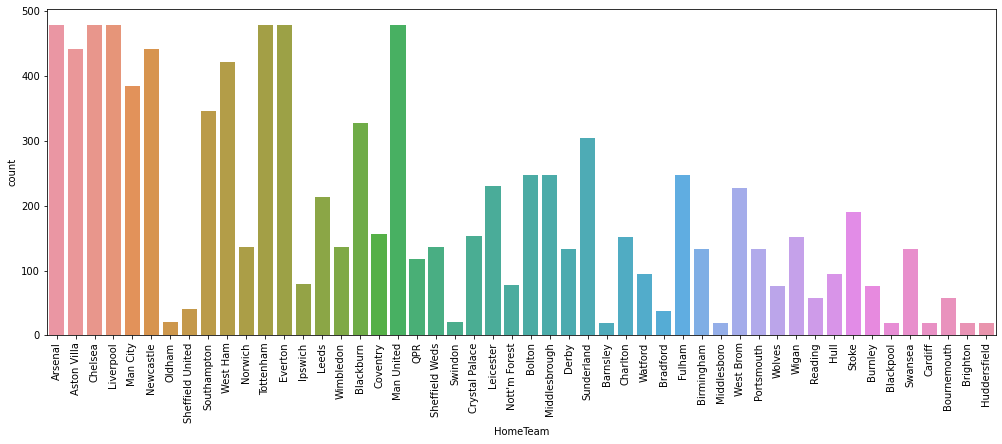

In [43]:
plt.figure(figsize=(17, 6))
sns.countplot(x='HomeTeam', data=dataset)
plt.xticks(rotation='vertical')
plt.show()

In [44]:
# Jumlah pertandingan tandang yang dimainkan masing-masing tim dari 1993 hingga Mei 2018
dataset["AwayTeam"].value_counts(dropna=False)

Man United          479
Tottenham           479
Liverpool           479
Chelsea             479
Arsenal             479
Everton             479
Newcastle           441
Aston Villa         441
West Ham            422
Man City            384
Southampton         346
Blackburn           327
Sunderland          304
Fulham              247
Middlesbrough       247
Bolton              247
Leicester           230
West Brom           228
Leeds               213
Stoke               190
Coventry            156
Crystal Palace      154
Wigan               152
Charlton            152
Wimbledon           137
Norwich             137
Sheffield Weds      137
Birmingham          133
Derby               133
Swansea             133
Portsmouth          133
QPR                 118
Hull                 95
Watford              95
Ipswich              80
Nott'm Forest        78
Wolves               76
Burnley              76
Bournemouth          57
Reading              57
Sheffield United     40
Bradford        

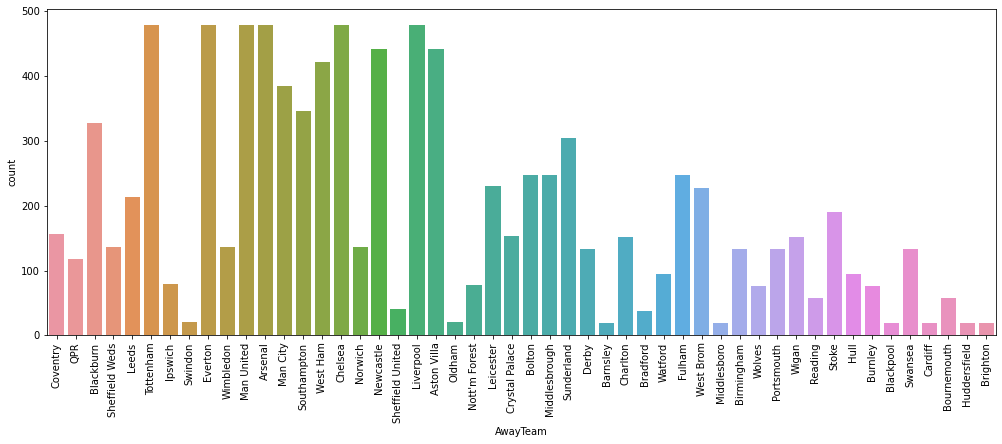

In [45]:
plt.figure(figsize=(17, 6))
sns.countplot(x='AwayTeam', data=dataset)
plt.xticks(rotation='vertical')
plt.show()

In [51]:
# Jumlah pertandingan yang dimenangkan tim di setiap musim

## Definisikan dahulu menggunakan kolom baru bernama 'Winner' 
## untuk setiap pertandingan
conditions = [dataset['FTR']=='A',dataset['FTR']=='H',dataset['FTR']=='D']
conditions
select = [dataset['AwayTeam'],dataset['HomeTeam'],'Draw']
dataset['Winner']=np.select(conditions, select)

In [52]:
## Menampilkan jumlah pertandingan masing-masing 
## tim yang dimenangkan di seluruh musim yang dilalui
swin = dataset.loc[:,['Season','Winner']]
gswin = swin.groupby(['Season', 'Winner']).size().reset_index(name='counts')
gsort = gswin.sort_values(['Season', 'counts'], ascending=[True, False])
gsort

,Season,Winner,counts
5,1993-94,Draw,142
11,1993-94,Man United,27
2,1993-94,Blackburn,25
12,1993-94,Newcastle,23
0,1993-94,Arsenal,18
...,...,...,...
516,2017-18,Huddersfield,9
524,2017-18,Swansea,8
522,2017-18,Southampton,7
523,2017-18,Stoke,7


<AxesSubplot:xlabel='Winner', ylabel='count'>

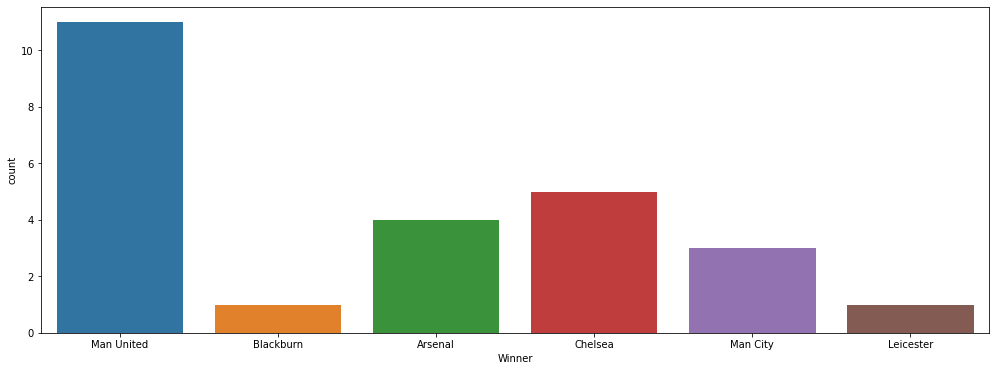

In [55]:
rem_draws = gsort[gsort.Winner.str.contains('Draw')==False].reset_index()
rem_draws

most_wins= rem_draws.groupby('Season').head(1)
most_wins
plt.figure(figsize=(17, 6))
sns.countplot(x='Winner', data=most_wins)

Dari plot di atas, terlihat jelas bahwa Manchester United adalah tim dengan jumlah kemenangan terbanyak setiap musim.

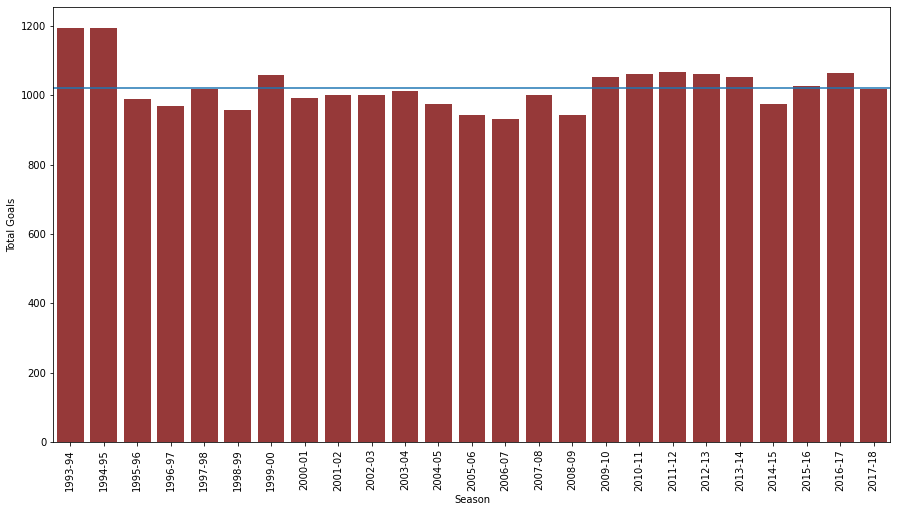

In [54]:
# Melihat jumlah gol di setiap seasonnya
dataset['Total Goals']= dataset['FTHG'] + dataset['FTAG']
loca = dataset.loc[:,['Season','Total Goals']]
summ =loca.groupby('Season').sum().reset_index()
tot = summ['Total Goals']
plt.figure(figsize=(15,8))
grid=sns.barplot(x='Season',y='Total Goals',data=summ,color='brown')
grid.set_xticklabels(summ['Season'],rotation=90)
plt.axhline(tot.mean())
plt.show()

data plot di atas, hanya musim 1993-94 dan 94-95 yang memiliki nilai jumlah gol lebih tinggi dari rata-rata dan awal 2010-2014 sedikit lebih tinggi dari nilai rata-rata.

In [65]:
# Berapa persentase keuntungan sebagai tim kandang 
# untuk mencetak gol?
epl_results_nodraw = dataset[dataset.Winner.str.contains('Draw')==False]
procentage_goal = len(dataset[dataset['FTR']=='H']) / len(epl_results_nodraw) * 100
print("Prosentase tim kandang mencetak gol:", '{:6.2f}'.format(procentage_goal))

Prosentase tim kandang mencetak gol:  62.67


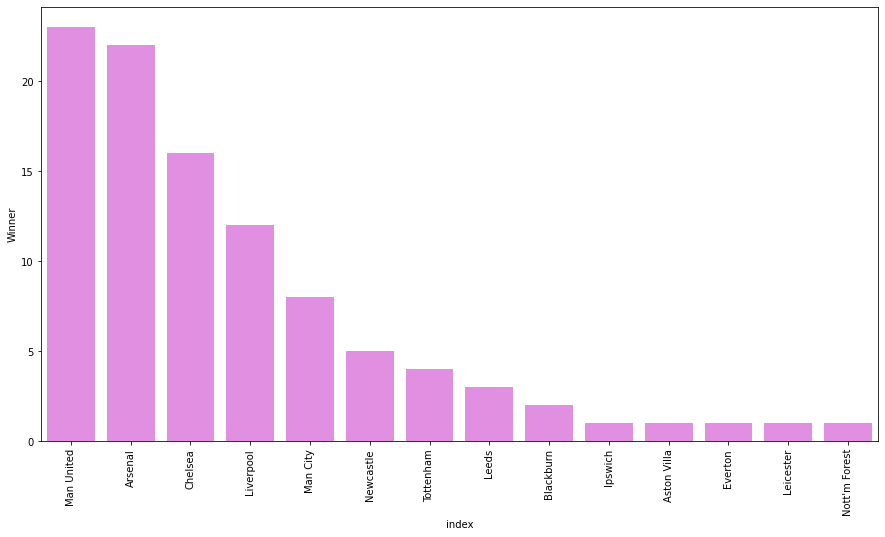

In [66]:
# 4 tim teratas di setiap musimnya
rem_draws1 = gsort[gsort.Winner.str.contains('Draw')==False].reset_index()
rem_draws1

top4 = rem_draws1.groupby('Season').head(4)
valc = top4['Winner'].value_counts().reset_index()
plt.figure(figsize=(15,8))
grid1=sns.barplot(x='index',y='Winner',data= valc, color='violet')
grid1.set_xticklabels(valc['index'],rotation=90)
plt.show()

Berdasarkan plot di atas, Manchester United tetap memimpin dengan masuk 4 tim teratas dengan jumlah leih dari 20 kali

### Model Definition

['14/08/93' 'Arsenal' 'Coventry' 0 3 'A' '1993-94' 'Coventry']
[3 5 3 ... 3 9 4]


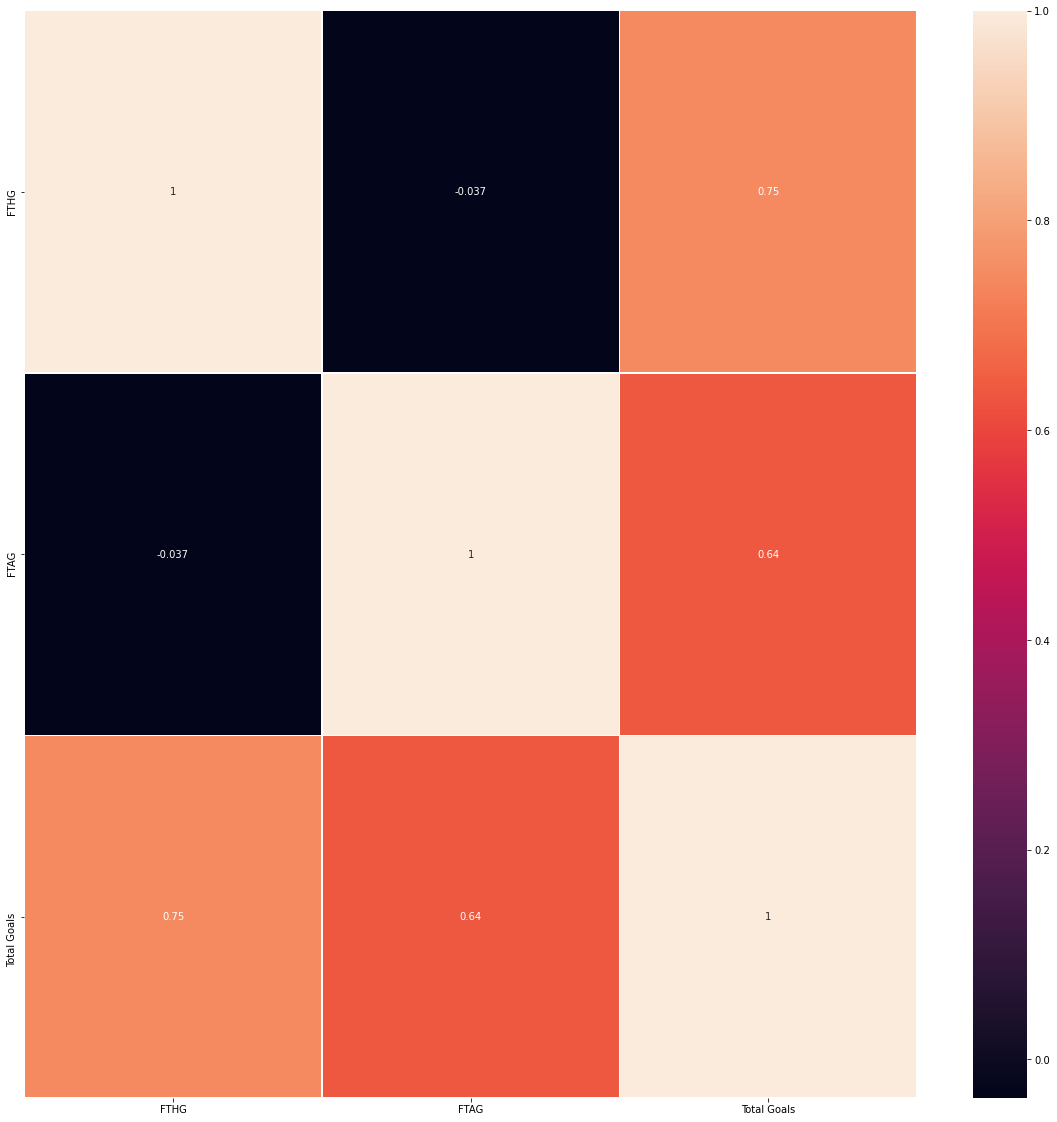

In [73]:
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values
print(X[0])
print(y)

## Determining the relevancy of features using heatmap in calculating the outcome variable
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#Plotting heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,linewidths=.75)
plt.show()

### Conclusion 